<a href="https://colab.research.google.com/github/Mariyam-hub/CodSoft/blob/main/Titanic_CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the Titanic dataset
dataset_path = '/content/archive (13).zip'
titanic_data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset
print(titanic_data.head())




   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Dropping columns that won't be useful for prediction
titanic_data_cleaned = titanic_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Handling missing values
imputer = SimpleImputer(strategy='most_frequent')
titanic_data_cleaned['Age'] = imputer.fit_transform(titanic_data_cleaned[['Age']])[:, 0] # Extract 1D array from the result
titanic_data_cleaned['Embarked'] = imputer.fit_transform(titanic_data_cleaned[['Embarked']])[:, 0] # Extract 1D array from the result


# Encoding categorical variables
label_enc = LabelEncoder()
titanic_data_cleaned['Sex'] = label_enc.fit_transform(titanic_data_cleaned['Sex'])
titanic_data_cleaned['Embarked'] = label_enc.fit_transform(titanic_data_cleaned['Embarked'])

# Verify cleaned data
print(titanic_data_cleaned.head())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into features and target
X = titanic_data_cleaned.drop('Survived', axis=1)
y = titanic_data_cleaned['Survived']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the splits
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (712, 7)
Testing data shape: (179, 7)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Training a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Making predictions
y_pred = rf_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Accuracy: 0.8156424581005587

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
 [[91 14]
 [19 55]]


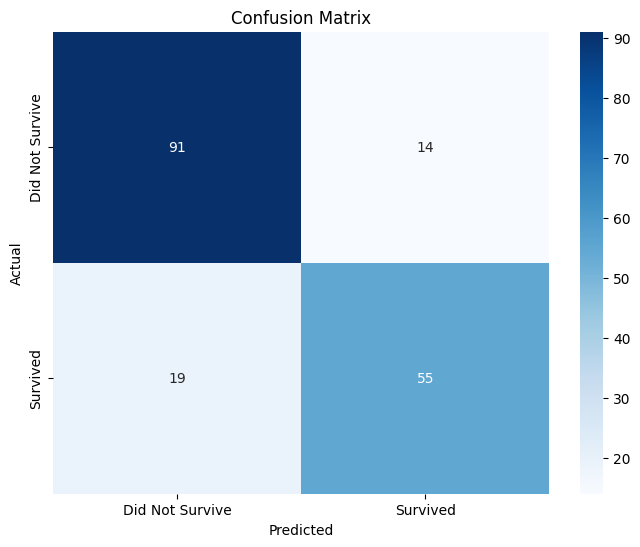

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<ipython-input-10-11be99850105>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


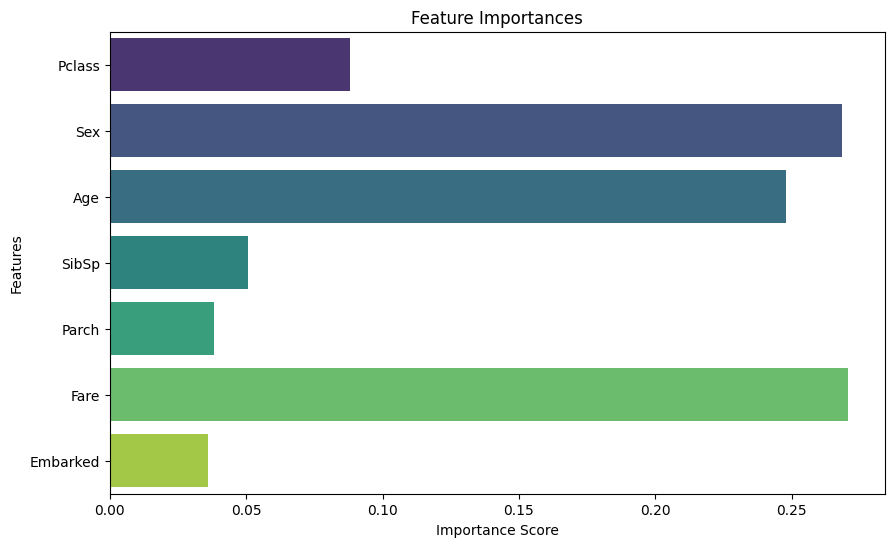

In [ ]:
# Feature importance visualization
feature_importances = rf_model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=features, palette="viridis")
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


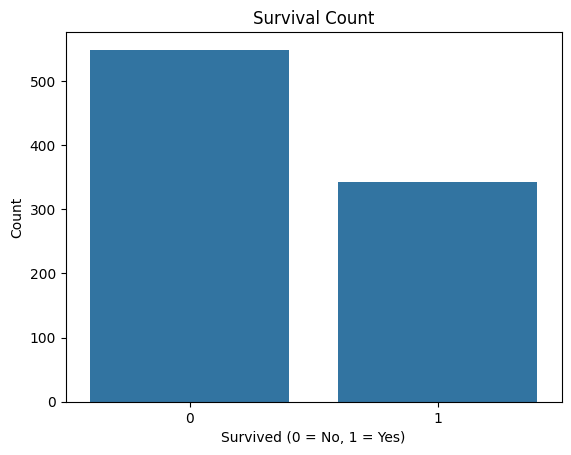

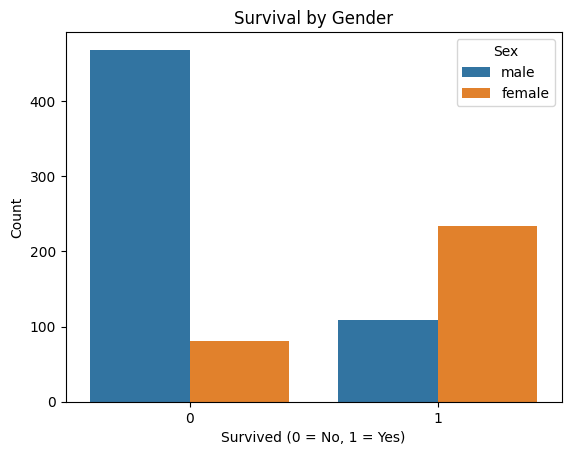

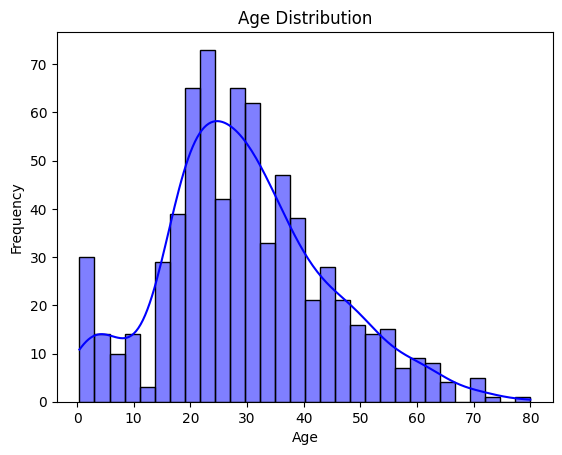

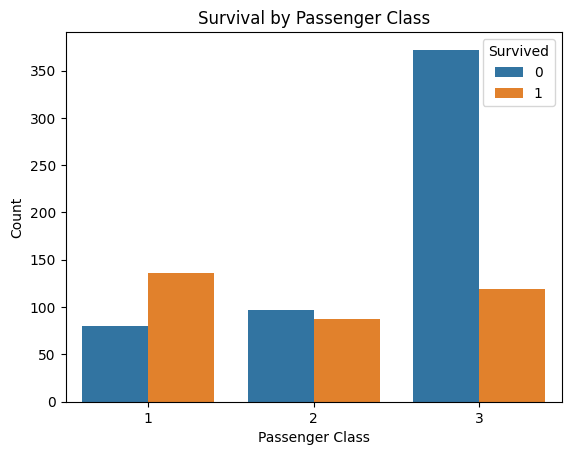

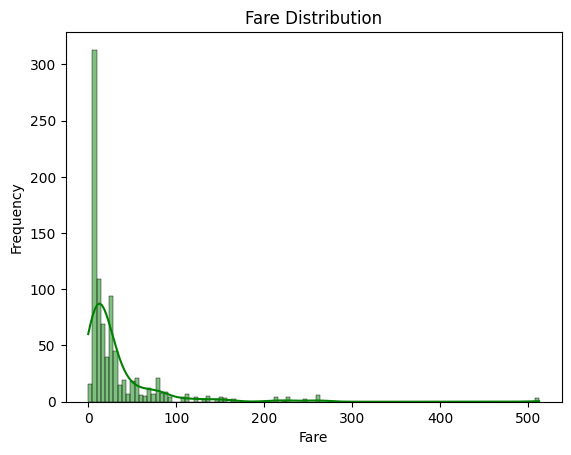

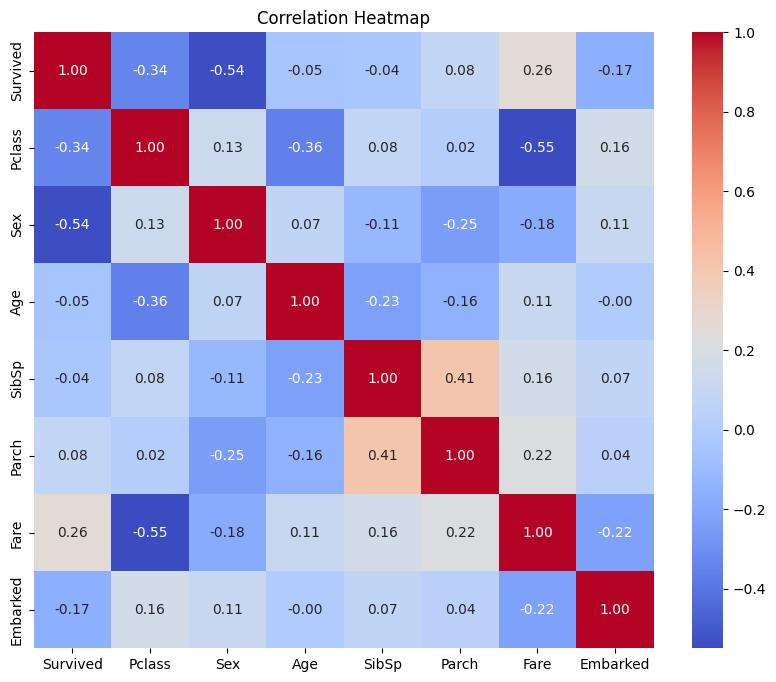

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot survival counts
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Survival by gender
sns.countplot(x='Survived', hue='Sex', data=titanic_data)
plt.title('Survival by Gender')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Age distribution
sns.histplot(titanic_data['Age'].dropna(), kde=True, bins=30, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Survival by passenger class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Fare distribution
sns.histplot(titanic_data['Fare'], kde=True, color='green')
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(titanic_data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


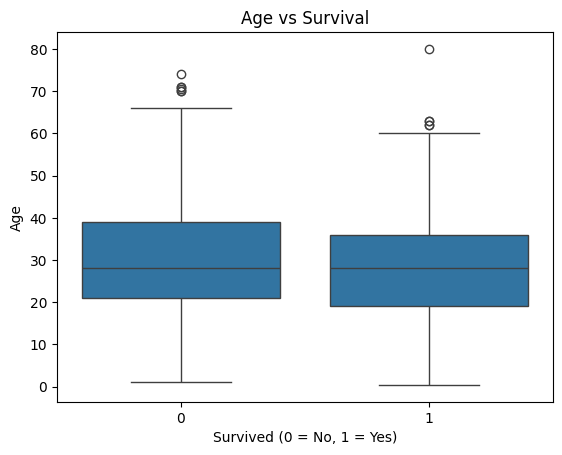

In [ ]:
sns.boxplot(x='Survived', y='Age', data=titanic_data)
plt.title('Age vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


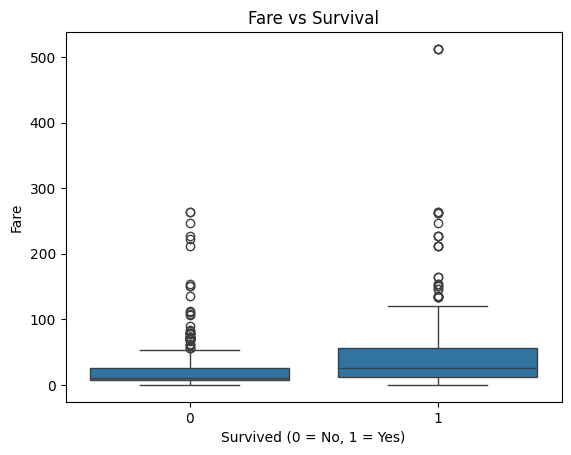

In [ ]:
sns.boxplot(x='Survived', y='Fare', data=titanic_data)
plt.title('Fare vs Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()


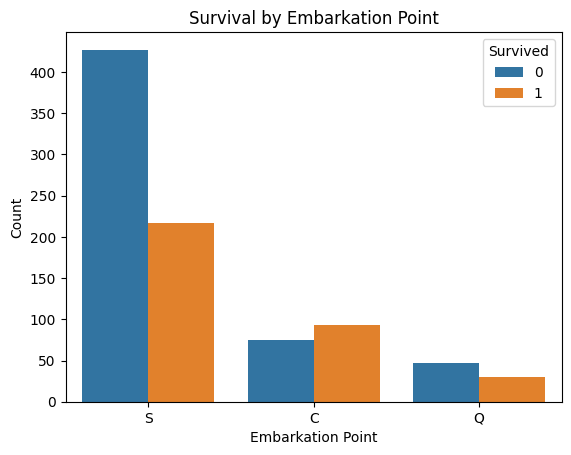

In [ ]:
sns.countplot(x='Embarked', hue='Survived', data=titanic_data)
plt.title('Survival by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()


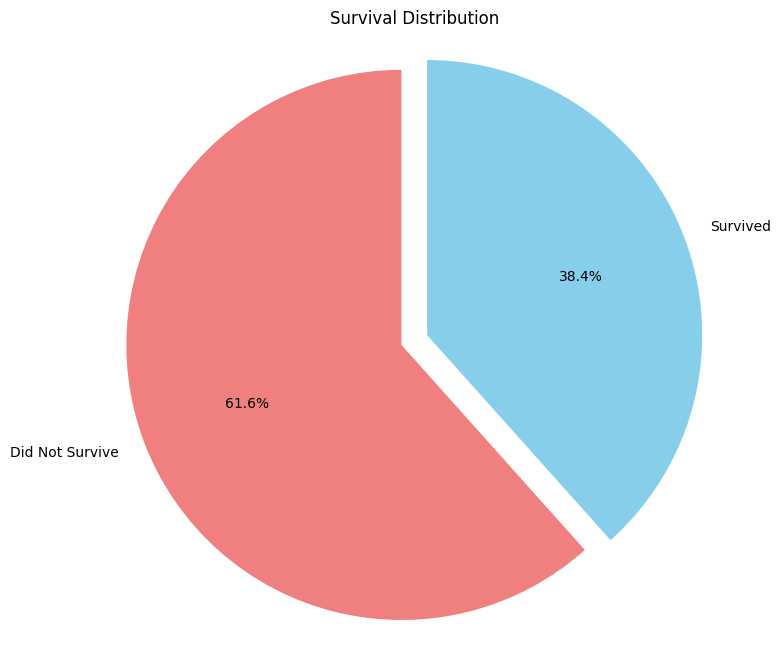

In [ ]:
# Pie chart for survival distribution
survival_counts = titanic_data['Survived'].value_counts()
labels = ['Did Not Survive', 'Survived']
colors = ['lightcoral', 'skyblue']

plt.figure(figsize=(8, 8))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0.1, 0])
plt.title('Survival Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()
